*Outer product state*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import random_unitary
from qreservoirpy import QReservoir, Layers, utilities

def analyze_fcn(res):
    vec = res[-5:]
    return np.concatenate((vec.flatten(), np.outer(vec.T, vec)[np.triu_indices(4)]))

def add_on(circ, timestep, operator, resop, encoder):
    # circ.barrier()
    circ.measure(circ.qubits[0])
    circ.initialize(encoder[timestep], [0, 1])
    circ.unitary(operator, [2, 3])
    circ.unitary(resop, circ.qubits)
    return circ

target = [0, 1, 2, 1, 2] * 10
res = QReservoir(qubits=4, layers=[
    Layers.H(),
    Layers.Timeseries(build_method=add_on),
    Layers.Measurement([0, 1, 2, 3])
], operator=random_unitary(2**2),
   resop = random_unitary(2**4),
 encoder = {
    0: '00',
    1: '01',
    2: '10',
    3: '11'
}, analyze_function=analyze_fcn, incrementally=True, M=5)


states = res.run(target, shots=10000)

res.circuit.draw('mpl')



[[0], [0, 1], [0, 1, 2], [0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2], [1, 2, 1, 2, 0], [2, 1, 2, 0, 1], [1, 2, 0, 1, 2], [2, 0, 1, 2, 1], [0, 1, 2, 1, 2]]


Simulating:   0%|          | 0/50 [00:00<?, ?it/s]

[0]


Simulating:   2%|▏         | 1/50 [00:01<01:18,  1.61s/it]

[0, 1]


Simulating:   4%|▍         | 2/50 [00:01<00:40,  1.18it/s]

[0, 1, 2]


Simulating:   6%|▌         | 3/50 [00:02<00:28,  1.64it/s]

[0, 1, 2, 1]


Simulating:   8%|▊         | 4/50 [00:02<00:23,  1.99it/s]

[0, 1, 2, 1, 2]


Simulating:  10%|█         | 5/50 [00:03<00:21,  2.13it/s]

[1, 2, 1, 2, 0]


Simulating:  12%|█▏        | 6/50 [00:03<00:20,  2.12it/s]

[2, 1, 2, 0, 1]


Simulating:  14%|█▍        | 7/50 [00:03<00:19,  2.24it/s]

[1, 2, 0, 1, 2]


Simulating:  16%|█▌        | 8/50 [00:04<00:17,  2.35it/s]

[2, 0, 1, 2, 1]


Simulating:  20%|██        | 10/50 [00:05<00:17,  2.33it/s]

[0, 1, 2, 1, 2]
[1, 2, 1, 2, 0]


Simulating:  22%|██▏       | 11/50 [00:05<00:16,  2.36it/s]

[2, 1, 2, 0, 1]


Simulating:  24%|██▍       | 12/50 [00:05<00:15,  2.43it/s]

[1, 2, 0, 1, 2]


Simulating:  26%|██▌       | 13/50 [00:06<00:16,  2.30it/s]

[2, 0, 1, 2, 1]


Simulating:  28%|██▊       | 14/50 [00:07<00:18,  1.96it/s]

[0, 1, 2, 1, 2]


Simulating:  30%|███       | 15/50 [00:07<00:18,  1.89it/s]

[1, 2, 1, 2, 0]


Simulating:  32%|███▏      | 16/50 [00:08<00:18,  1.80it/s]

[2, 1, 2, 0, 1]


Simulating:  34%|███▍      | 17/50 [00:08<00:19,  1.68it/s]

[1, 2, 0, 1, 2]


Simulating:  36%|███▌      | 18/50 [00:09<00:19,  1.66it/s]

[2, 0, 1, 2, 1]


Simulating:  38%|███▊      | 19/50 [00:10<00:19,  1.56it/s]

[0, 1, 2, 1, 2]


Simulating:  40%|████      | 20/50 [00:10<00:18,  1.60it/s]

[1, 2, 1, 2, 0]


Simulating:  44%|████▍     | 22/50 [00:11<00:16,  1.71it/s]

[2, 1, 2, 0, 1]
[1, 2, 0, 1, 2]


Simulating:  44%|████▍     | 22/50 [00:12<00:15,  1.77it/s]


KeyboardInterrupt: 

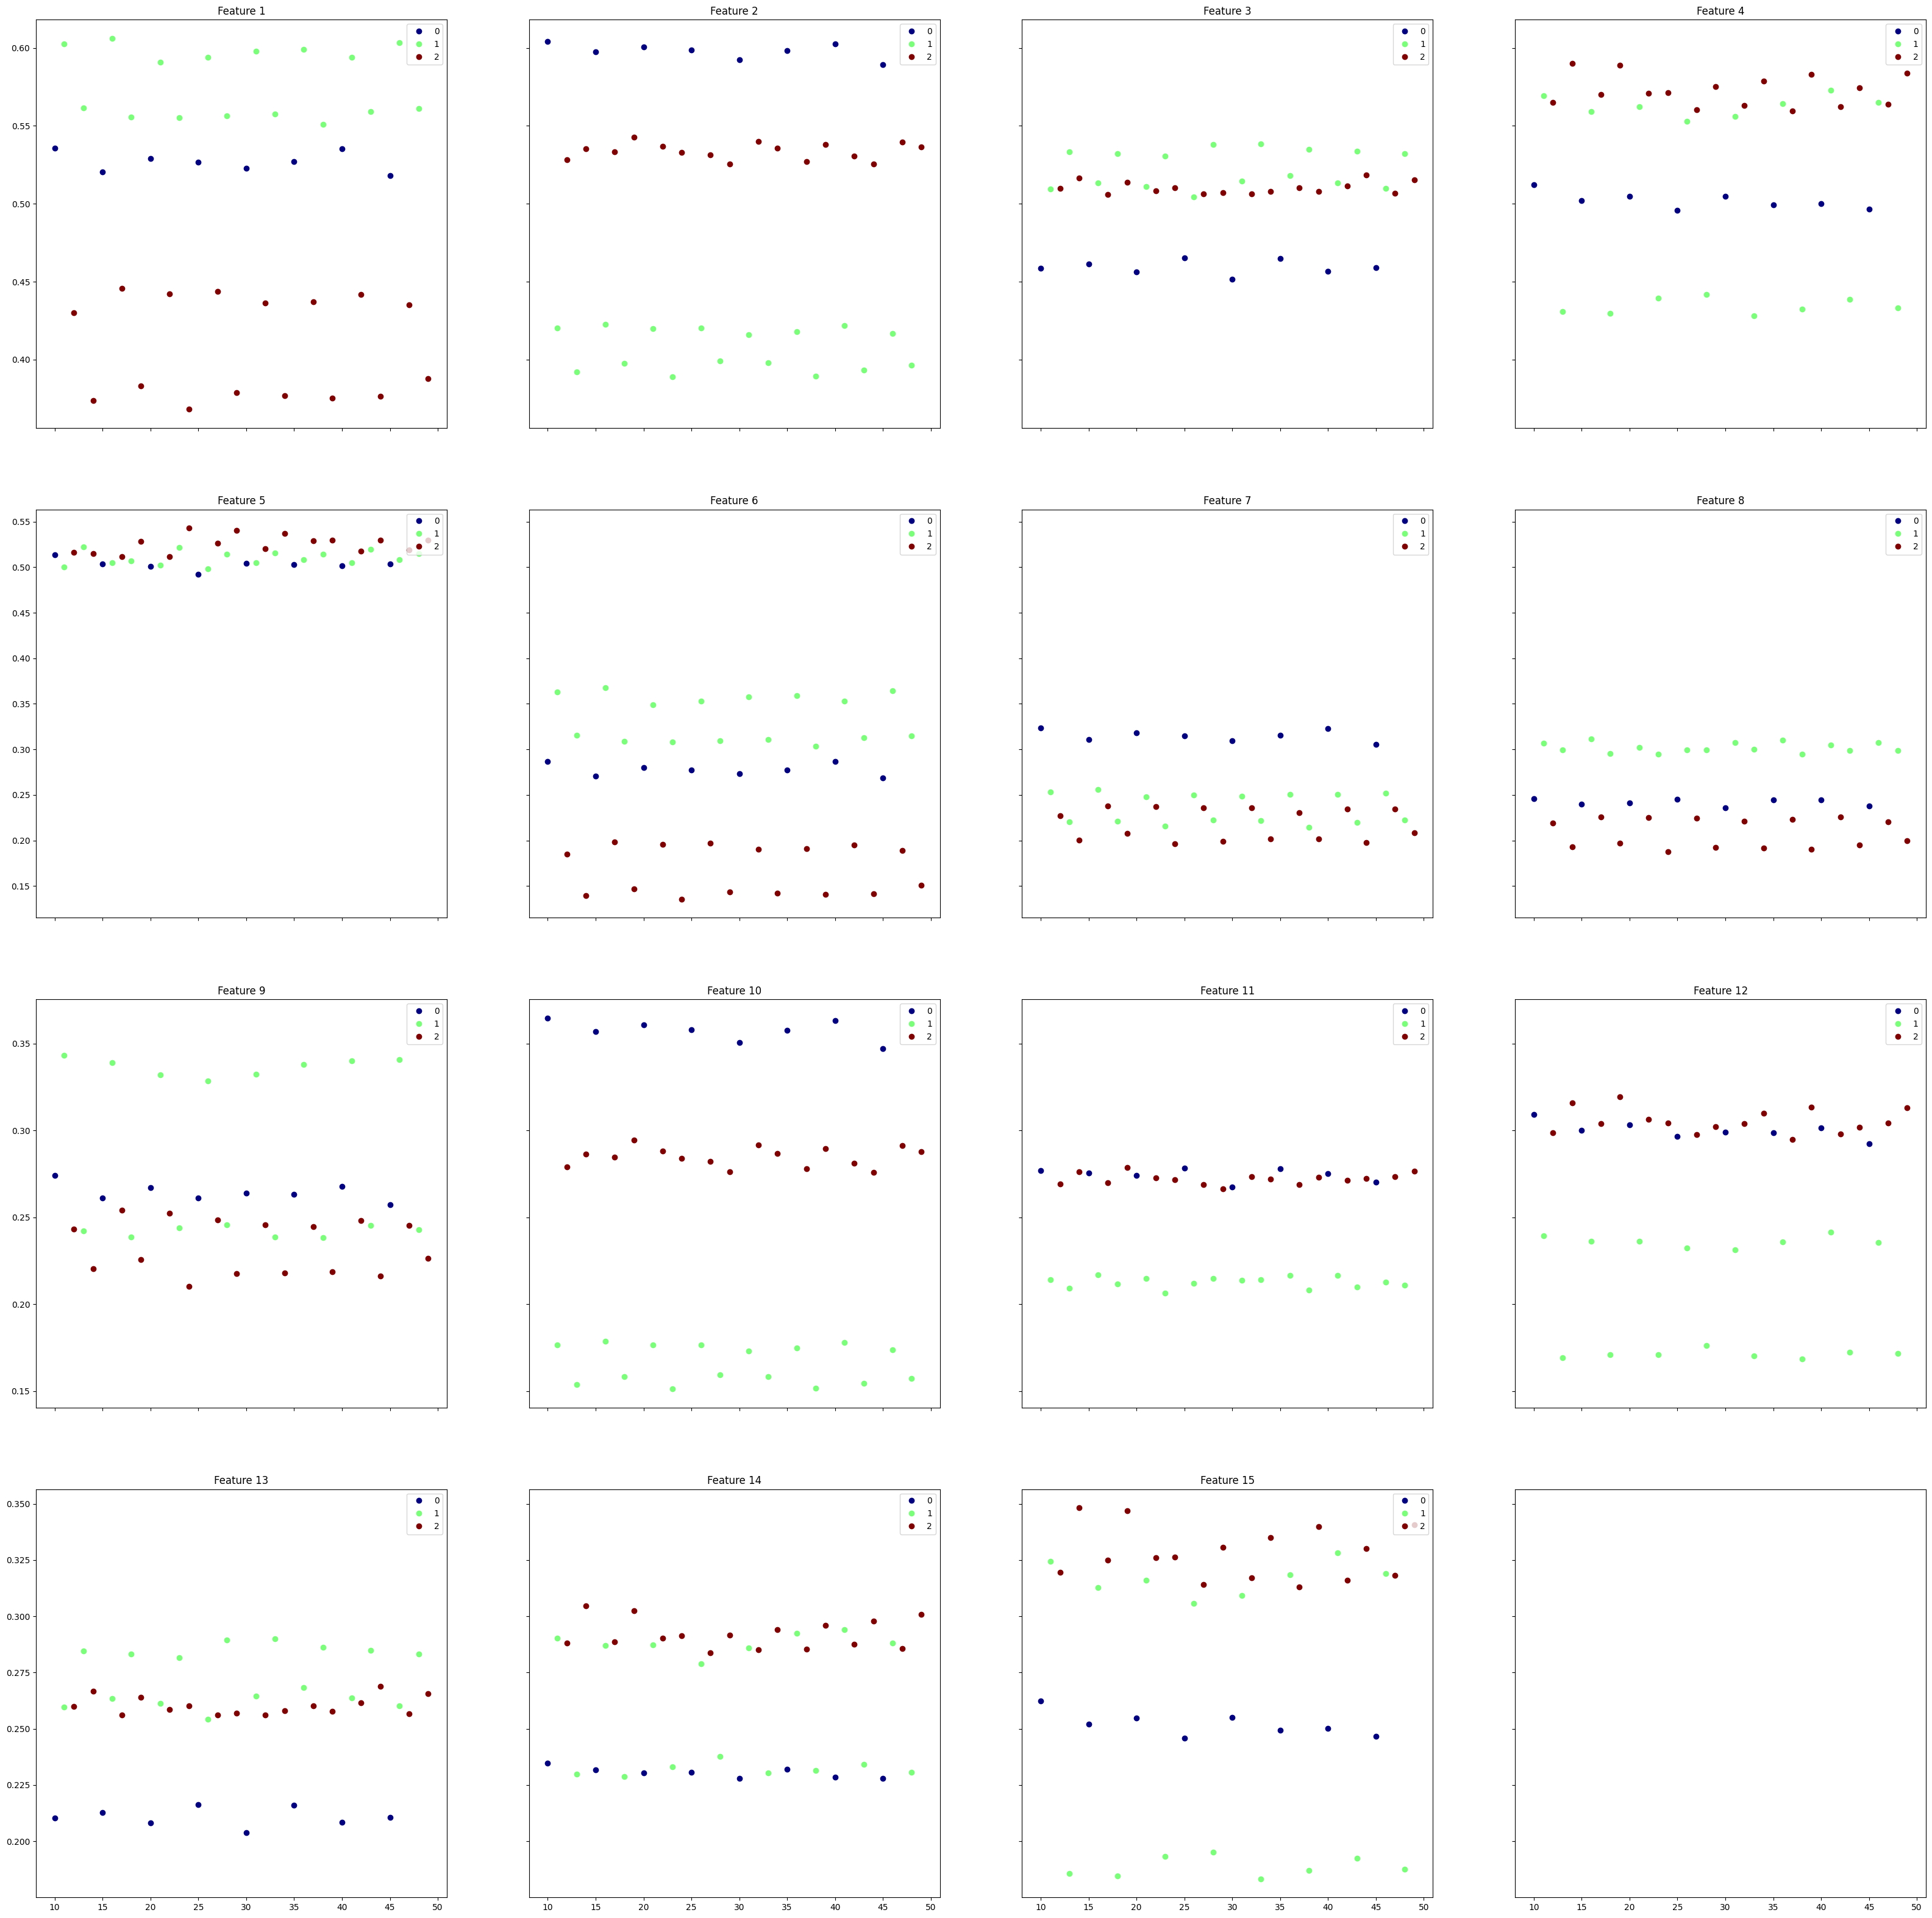

In [ ]:
fig ,axes = utilities.result_plotter(states, target, warmup=0.2)